In [1]:
from data import YOLODataset,PASCALDataModule
import torch
from torch.utils.data import DataLoader

from helpers import cells_to_bboxes,plot_image
from helpers import non_max_suppression  as nms
from config import ANCHORS,TEST_TRANSFORMS,TRAIN_TRASFORMS

c:\Users\muthu\miniconda3\envs\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = YOLODataset(
        "../../../data/PASCAL_VOC/train.csv",
        "../../../data/PASCAL_VOC/images/",
        "../../../data/PASCAL_VOC/labels/",
        S=[13, 26, 52],
        anchors=ANCHORS,
        transform=TRAIN_TRASFORMS,
    )

S = [13, 26, 52]
scaled_anchors = torch.tensor(ANCHORS) / (
    1 / torch.tensor(S).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
)
loader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)

In [3]:
datas =loader.dataset[3]
print(len(datas))

print(f"image size:: {datas[0].shape}")
print(f"13x13 predicted layer:{datas[1][0].shape}\n26x26 predicted layer:{datas[1][1].shape}\n52x52 predicted layer:{datas[1][2].shape}")

2
image size:: torch.Size([3, 416, 416])
13x13 predicted layer:torch.Size([3, 13, 13, 6])
26x26 predicted layer:torch.Size([3, 26, 26, 6])
52x52 predicted layer:torch.Size([3, 52, 52, 6])


In [4]:
loader.dataset[3][0].shape

torch.Size([3, 416, 416])

In [5]:
loader.dataset[3][1][0].shape

torch.Size([3, 13, 13, 6])

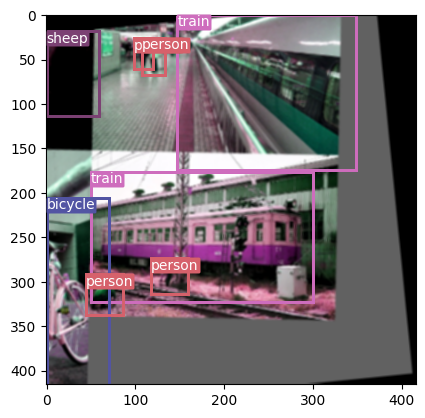

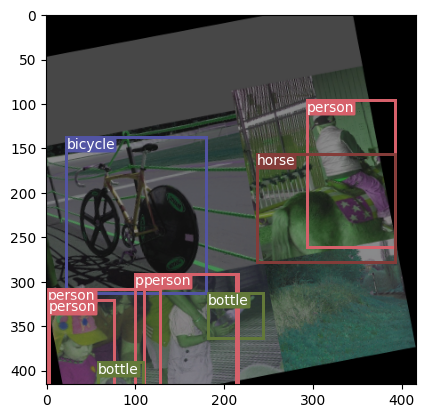

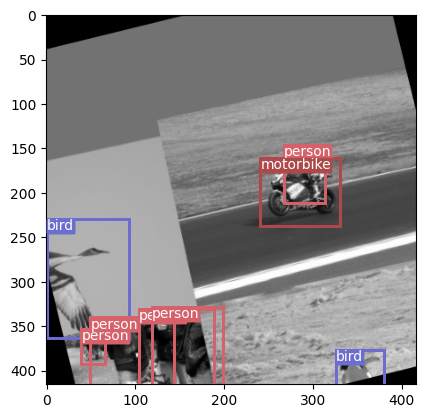

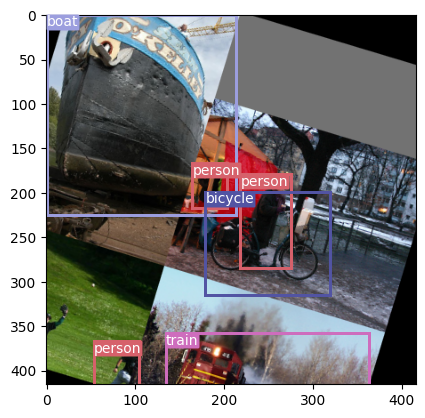

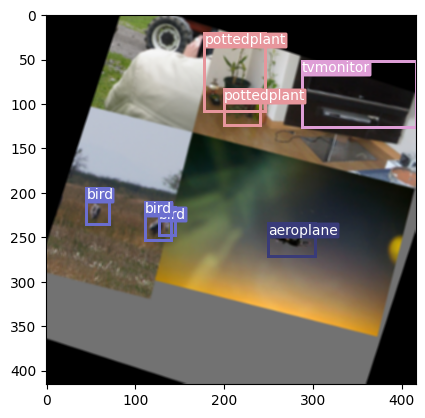

In [6]:
for idx,(x, y) in enumerate(loader):
    if idx==5: break
    boxes = []
    for i in range(y[0].shape[1]):
        anchor = scaled_anchors[i]
        boxes += cells_to_bboxes(
            y[i], is_preds=False, S=y[i].shape[2], anchors=anchor
        )[0]
    boxes = nms(boxes, iou_threshold=1, threshold=0.1, box_format="midpoint")
    plot_image(x[0].permute(1, 2, 0).to("cpu"), boxes)
    

In [7]:
data_modules = PASCALDataModule(
                    "../../../data/PASCAL_VOC/train.csv",
                    "../../../data/PASCAL_VOC/test.csv"
                )

In [9]:
data_modules.setup()

In [13]:
len(data_modules.train_dataloader())

65